# Chapter 17 SVM

#### Hyperplanes Explained：一個超平面是一個n維空間中的一個n-1維子空間。
#### SVM藉著能找到能將training data中各類型的邊距最大化的超平面來對資料作分類。切開資料的感覺

### 線性分類器訓練

In [3]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# 載入僅帶有二類型與二特徵的資料
iris = datasets.load_iris()
features, target = iris.data[:100, :2], iris.target[:100]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [4]:
# 產生SVM
svc = LinearSVC(C=1.0) # C是SVC學習器的參數，是在資料點錯誤分類時加上來的懲罰。
model = svc.fit(features_standardized, target)

#### Notes: SVM視覺化

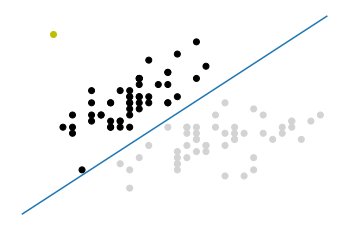

In [16]:
import  matplotlib.pyplot as plt
# 上色
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:, 0], features_standardized[:, 1],  c=color)
# 這邊加上下面的分類
plt.scatter(-2, 3,  c='y') # 看得出來是array[0]
# 產生超平面
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0] / w[1])
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [11]:
new_observtion = [[-2, 3]]
svc.predict(new_observtion)

array([0])

### 以kernel處理線性可分模型

In [19]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(0)
features = np.random.randn(200, 2)

In [21]:
# XOR產生線性不可分類型
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

In [29]:
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
model = svc.fit(features, target)

#### Notes: 簡單說明SVM

$f(x)=\beta_0+\sum_{i\in S}\alpha_iK(x_i, x_{i'})$

$\beta_0$是bias，S是所有支持向量觀察所成的集合，$\alpha$是要學習的模型參數，後面跟著一對支持向量$(x_i, x_{i'})$，K是一個kernel能夠比較兩個的相似程度。

#### Kernel 有好多種

* **如果要解基本線性超平面，就可使用線性核**

$K(x_i, x_{i'})=\sum_{j=1}^px_{ij}x_{i'j}$

* **其中$p$是特徵數，如果要解非線性決策邊界，則須將線性核換成多項式核**

$K(x_i, x_{i'})=(1+\sum_{j=1}^px_{ij}x_{i'j})^d$

* **其中$d$是多項式核函式的次數(degree)。此外，我們可以使用一在支持向量機中最常被用到的核，徑向基核函式(radial basis function kernel)**

$K(x_i, x_{i'})=e^{(-\gamma\sum_{j=1}^p(x_{ij}x_{i'j})^2)}$          (其中 $\gamma$ 是超參數，一定要大於 0)

#### Notes: Sebastian Raschka

In [35]:
from matplotlib.colors import ListedColormap
import  matplotlib.pyplot as plt

In [39]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # Flatten & Transpose
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y == cl, 1],
                   alpha=.8, c=cmap(idx),
                   marker="+", label=cl)

In [40]:
svc_linear = SVC(kernel="linear", random_state=0, C=1)
svc_linear.fit(features, target)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


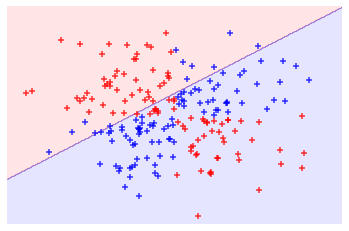

((-3.0, 2.9800000000000058, -3.0, 2.9800000000000058), None)

In [41]:
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show()

#### 上面分類結果很爛，下面改用徑向基核函式

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


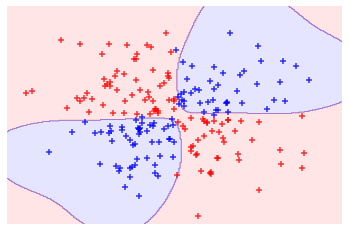

((-3.0, 2.9800000000000058, -3.0, 2.9800000000000058), None)

In [42]:
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
model = svc.fit(features, target)
plot_decision_regions(features, target, svc)
plt.axis("off"), plt.show()

### 產生預測機率

In [50]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris()
features, target = iris.data, iris.target
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [51]:
svc = SVC(kernel="linear", probability=True, random_state=0) # 要設為True
model = svc.fit(features_standardized, target)
new_observtion = [[.4, .4, .4, .4]]
model.predict_proba(new_observtion)

array([[0.00582525, 0.96725691, 0.02691783]])

#### Notes: SVM不像是KNN說觀察K個近鄰的類型，然後再透過voting的方式判斷它屬於哪個類型，SVC使用之超平面產生的決策區域並不是輸出估測該觀察屬於某特定類型的機率。不過還是可以輸出帶一些警示項目(caveats)的校正類型機率。在具有兩類型的SVC中，我們可以用Platt縮放，做法是在SVC訓練後，在另外訓練一個交叉驗證邏輯迴歸，將SVC輸出對應成機率。

$P(y=1|x)=\frac{1}{1+e^{(A\times f(x)+B)}}$  $A,B$是參數向量，$f$是第$i$個觀察與超平面間的有號距離，超過二類型則用擴充型Platt。

### 找出支持向量

In [52]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris()
features, target = iris.data[:100, :], iris.target[:100]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [53]:
svc = SVC(kernel="linear", random_state=0)
model = svc.fit(features_standardized, target)

In [54]:
# 檢視支持向量
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

#### Notes: 直覺上，我會把超平面想成是這些支持向量帶出來的。

In [55]:
# 支持向量索引值
model.support_

array([23, 41, 57, 98])

In [56]:
# 找個類型之支持向量數目
model.n_support_

array([2, 2])

### 處理不平衡之分類

In [57]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris()
features, target = iris.data[:100, :], iris.target[:100]
features = features[40:, :]
target = target[40:]
target = np.where((target==0), 0, 1)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [59]:
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)
svc.fit(features_standardized, target)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

#### Notes: SVM中，C是決定觀察樣本被錯誤分類時之懲罰的超參數，那其中一個方法來解決不平衡就是以類型對C設權重。
$C_k=C* w_j$

##### **這是因為增加少數類型錯誤的懲罰可避免他們被主要類型覆蓋掉。**

#### 另外sklearn中可加入參數，以自動設定$C_j$值。$W_j=\frac{n}{kn_j}$

# Chapter 18 Naive Bayes' Theorem

$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$

#### Notes: 明確地說，naive bayes' theorem 是基於:
$P(y|x_1,...,x_j)=\frac{P(x_1,...x_j|y)P(y)}{P(x1,...,x_j)}$

### 訓練連續型特徵的分類器

In [61]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
iris = datasets.load_iris()
features, target = iris.data, iris.target
# 產生高斯naive bayes分類器
clf = GaussianNB()
model = clf.fit(features, target)

In [62]:
new_observation = [[4, 4, 4, 0.4]]
model.predict(new_observation)

array([1])

In [63]:
# 或事先指定先驗信念
clf = GaussianNB(priors=[0.25, 0.25, 0.5])
model = clf.fit(features, target)

### 訓練離散與計數型特徵的分類器

In [64]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
text_data = np.array(['I love Brazil. Brazil!', 'Brazil is best', 'Germant beats both'])
count = CountVectorizer()
bow = count.fit_transform(text_data)

In [69]:
features = bow.toarray()
features

array([[0, 0, 0, 2, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 0]], dtype=int64)

In [70]:
target = np.array([0, 0, 1])
clf = MultinomialNB(class_prior=[0.25, 0.5])
model = clf.fit(features, target)

In [71]:
new_observation = [[0, 0, 0, 1, 0, 1, 0]]
model.predict(new_observation)

array([0])

#### MultinonialNB內含了一個須被調整的加成性平滑超參數alpha(additive smoothing hyperparameter)。其預設值為1.0，0.0為不做處理。

#### Notes: 多項naive bayes' 最常用在離散資料上或是詞袋跟tf-idf文字分類工作上。另外如果沒有指定class_prior，先驗機率會以學習資料的方式來獲得，若要用均勻分布來當作先驗機率的話，須設定fit_prior=False。

### 訓練二元型特徵的樸素貝式分類器

In [81]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
features = np.random.randint(2, size=(100, 3)) # random 0, 1
target = np.random.randint(2, size=(100, 1)).ravel()
clf = BernoulliNB(class_prior=[0.25, 0.5])
model = clf.fit(features, target)
# 均勻分布
# model_uniform_prior = BernoulliNB(class_prior=None, fit_prior=False)

### 預測機率之校正

In [82]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
iris = datasets.load_iris()
features = iris.data
target = iris.target
clf = GaussianNB()
# 以S型曲線校正產生校正後的交叉驗證
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method="sigmoid")
clf_sigmoid.fit(features, target)

CalibratedClassifierCV(base_estimator=GaussianNB(priors=None,
                                                 var_smoothing=1e-09),
                       cv=2, method='sigmoid')

In [83]:
new_observation = [[2.6, 2.6, 2.6, 0.4]]
clf_sigmoid.predict_proba(new_observation)

array([[0.31859969, 0.63663466, 0.04476565]])

In [84]:
clf.fit(features, target).predict_proba(new_observation)

array([[2.31548432e-04, 9.99768128e-01, 3.23532277e-07]])

In [85]:
clf_sigmoid.predict_proba(new_observation)

array([[0.31859969, 0.63663466, 0.04476565]])